<a href="https://colab.research.google.com/github/rmperez556/CD_databits/blob/main/01_Proyecto_final_Fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-header-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>


# <center>  Proyecto Final - Fase 1  </center>

## Descripción
En esta fase se explicará el proyecto y se realizará la carga de los datos. Además se implementará el correspondiente análisis exploratorio de datos (EDA)
  
<img alt="Caution" title="Caution" style="vertical-align: text-bottom; position: relative; height:1.3em; top:0.0em" src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/icons/danger.png"/> **Disclaimer:** Este material ha sido preparado por el equipo de **handytec Academy®**. Se prohibe la publicación o reproducción de este material sin previa autorización de **handytec Academy®** - 2022 Todos los derechos reservados.

## Problema de negocio

Un problema imperante en el entorno bancario a nivel global se enfoca en el riesgo crediticio o riesgo de impago. 
  
Este aspecto hace refencia a las pérdidas que incurren los bancos dado que los prestamistas son incapaces de devolver los créditos otorgados. 

Lo cual conlleva la siguiente pregunta: **¿Cómo poder reducir el número de personas que caen en mora crediticia?**

## Objetivos del proyecto

El objetivo de este proyecto es construir un modelo que las entidades financieras puedan usar para ayudar a tomar las mejores decisiones financieras.

Este modelo identificará la probabilidad de caer en mora crediticia por parte de los clientes que recibieron un crédito (modelos de default comportamentales).

Mediante el uso de diferentes algoritmos se obtendrá la probabilidad de impago en cada individuo. El principal indicador que se va usar para ver la bonanza de los distintos modelos va a ser el AUC (Area Under the Curve) generado por las curvas ROC.

## Importar librerías y verificar versiones

In [2]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
print('** Versiones Actuales | Requeridas **')
print('Python:\nVersion Actual:', sys.version, ' | Requerida >= 3.6')
print('NumPy:\nVersion Actual: {:10} | Requerida >= 1.16.2'.format(np.__version__))
print('Pandas:\nVersion Actual: {:10}| Requerida >= 1.0.1'.format(pd.__version__))
print('Matplotlib:\nVersion Actual: {:10} | Requerida >= 3.0.3'.format(matplotlib.__version__))
print('Seaborn:\nVersion Actual: {:10} |Requerida >= 0.9.0 '.format(sns.__version__))

** Versiones Actuales | Requeridas **
Python:
Version Actual: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]  | Requerida >= 3.6
NumPy:
Version Actual: 1.21.6     | Requerida >= 1.16.2
Pandas:
Version Actual: 1.3.5     | Requerida >= 1.0.1
Matplotlib:
Version Actual: 3.2.2      | Requerida >= 3.0.3
Seaborn:
Version Actual: 0.11.2     |Requerida >= 0.9.0 


## Descripción de las variables contenidas en el _dataset_

El _dataset_ usado proviene de la plataforma **Kaggle**, y se encuentra separado en dos partes. 

La primera parte contiene los datos que serán usados para el entrenamiento del modelo, que serán nombrados como *datos_training*. La segunda parte son los datos que se usarán para el test del modelo *datos_test*. Estas muestras contienen 150.000 y 101.503 registros, respectivamente (aunque existen algunos campos que tienen distintos valores ausentes). 

Accesso a la Competencia **Give Me Some Credit:** [Link de acceso](https://www.kaggle.com/c/GiveMeSomeCredit/overview)

Link de descarga correspondiente a cada dataset: 
* [training data](https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-training.csv)
* [test data](https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/Proyecto%20Final/cs-test.csv)

* **SeriousDlqin2yrs:** Persona que tiene 90 días de morosidad vencida o peor (Si = 1 y  No = 0)
* **RevolvingUtilizationOfUnsecuredLines:** El saldo total en tarjetas de crédito y líneas de crédito personales (excepto bienes inmuebles y sin deuda a plazos) sobre la suma de los límites de crédito
* **Age:** Edad prestamista en años 
* **NumberOfTime30-59DaysPastDueNotWorse:** Número de veces que el prestatario ha caido en mora entre 30 y 59 días, pero no ha empeorado en los últimos 2 años 
* **DebtRatio:** Pagos mensuales de deuda sobre el ingreso bruto mensual 
* **MonthlyIncome:** Ingreso mensual 
* **NumberOfOpenCreditLinesAndLoans:** Número de préstamos abiertos (cuotas como préstamos para automóviles o hipotecas) y líneas de crédito 
* **NumberOfTimes90DaysLate:** Número de veces que el prestatario ha caido en mora entre 90 días o más 
* **NumberRealEstateLoansOrLines:** Número de préstamos hipotecarios e inmobiliarios, incluidas las líneas de crédito hipotecario 
* **NumberOfTime60-89DaysPastDueNotWorse:** Número de veces que el prestatario ha caido en mora entre 60 y 89 días, pero no ha empeorado en los últimos 2 años 
* **NumberOfDependents:** Número de dependientes en la familia excluyendose a si mismos (ej: cónyuge, hijos, etc.)

## Carga de los datos

### **Importante**

Recordar descargar los archivos localmente y subirlos al sistema de archivos de Google Colab

In [4]:
# Colocar la ruta del directorio correspondiente a cada dataset
ruta_training = "/content/drive/MyDrive/Colab Notebooks/cs-training.csv"
ruta_test     = "/content/drive/MyDrive/Colab Notebooks/cs-test.csv"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Lectura de los datos usando pandas (creación de DataFrames)
datos_training = pd.read_csv(ruta_training, sep = ',', decimal = '.', index_col = 0)
datos_test     = pd.read_csv(ruta_test,     sep = ',', decimal = '.', index_col = 0)

## Revisión preliminar de los datasets

**Importante:** Realizar un comparativa entre el conjunto de datos de entrenamiento y test ejecutando las siguientes instrucciones

In [7]:
import numpy as np
import pandas as pd

In [8]:
# Imprimir las 10 primera filas de los datos de entrenamiento
datos_entrenamietno = datos_training
datos_training.iloc[:10]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [9]:
# Imprimir las 10 últimas filas de los datos de test (usar el método tail)
datos_prueba = datos_test


In [10]:
# Imprimir el número de filas y columnas de ambos datasets
print(datos_prueba.shape)
print(datos_entrenamietno.shape)

(101503, 11)
(150000, 11)


In [11]:
# Imprimir los tipos de datos de cada columna en el dataset de entrenamiento
print(datos_entrenamietno.dtypes)

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [12]:
# Imprimir los tipos de datos de cada columna en el dataset de test
print(datos_prueba.dtypes)

SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


## Análisis exploratorio de datos

Los siguientes bloques de código nos vamos a enfocar en analizar el DataFrame `datos_training`.

**Importante:** Ejecutar las instrucciones e interpretar los resultados

### Análisis de valores duplicados

In [74]:
# Contabilizar filas duplicadas en todas sus columnas empleando los métodos duplicated() y value_counts() en el DataFrames datos_training
datos_entrenamietno

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


### Análisis de valores perdidos

In [75]:
# Identificar el número de filas con valores perdidos por cada columna con los métodos isnull() y sum() en el DataFrames datos_training
nulos = pd.isnull(datos_entrenamietno)
nulos

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,True,False,False,False,False,False
149999,False,False,False,False,False,False,False,False,False,False,False


### Análisis univariante

**Importante:** Ejecutar las instrucciones e interpretar los resultados

In [76]:
# Analizar las principales estadísticas descriptivas de cada columna en el DataFrame datos_training (usar el método describe)
print(datos_entrenamietno.describe())
print(datos_prueba.describe())


       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

In [77]:
# Realizar un conteo de las categorías en la variable SeriousDlqin2yrs empleando value_counts()
datos_entrenamietno.value_counts('SeriousDlqin2yrs')

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64

In [78]:
datos_entrenamietno.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Con el dataframe **datos_training**, realizar el siguiente análisis para la variable `MonthlyIncome`

In [79]:
ingresos = datos_entrenamietno.MonthlyIncome  
ingresos
edad = datos_entrenamietno.age
edad

1         45
2         40
3         38
4         30
5         49
          ..
149996    74
149997    44
149998    58
149999    30
150000    64
Name: age, Length: 150000, dtype: int64

In [80]:
import sys
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [81]:
# Analizar las principales estadísticas descriptivas de la columna ingresos
media    = edad.mean()
mediana  = edad.median()
moda     = edad.mode()
max = edad.max()
min = edad.min()
print('La media es:' , media) ,
print(      'La mediana es:' , mediana )
print(      'La moda es:' , moda  )
print(      'El maximo es:' , max )
print(      'El minimo es:' , min)

La media es: 52.295206666666665
La mediana es: 52.0
La moda es: 0    49
dtype: int64
El maximo es: 109
El minimo es: 0


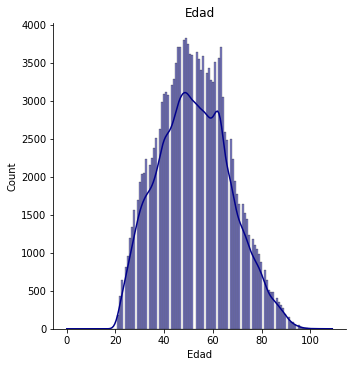

In [89]:
# Crear un histograma de la variable ingresos (usar la librería seaborns)
sns.displot(edad, color="darkblue", kde=True)
plt.title("Edad")
plt.xlabel("Edad")
plt.show()

In [83]:
# Obtener los deciles de la variable ingresos
edad.quantile(np.arange(0.1,1.1 ,0.1 ))

0.1     33.0
0.2     39.0
0.3     44.0
0.4     48.0
0.5     52.0
0.6     56.0
0.7     61.0
0.8     65.0
0.9     72.0
1.0    109.0
Name: age, dtype: float64

El límite inferior para valores extremos es: 8.0
El límite superior para valores extremos es: 96.0


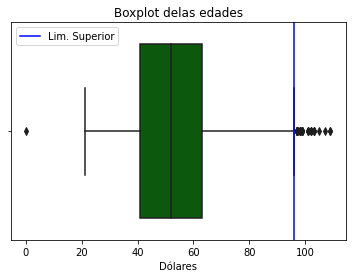

In [84]:
# Crear un box-plot la variable ingresos (usar la librería seaborns)
IQR  = stats.iqr(edad)
whis = 1.5
cons = IQR * whis

#Cuartiles
Q1   = edad.quantile(0.25)
Q3   = edad.quantile(0.75)

print("El límite inferior para valores extremos es:", (Q1-cons))
print("El límite superior para valores extremos es:", (Q3+cons))

sns.boxplot(x=edad, color="darkgreen", whis=1.5) 
plt.title("Boxplot delas edades")
plt.xlabel("Dólares")
plt.axvline(Q3+cons, color='blue', label='Lim. Superior')
plt.legend()
plt.show()

### Análisis multivariante

**Importante:** Ejecutar las instrucciones e interpretar los resultados

In [85]:
# Agrupar el dataframe datos_training por la variable SeriousDlqin2yrs y emplear como formas de agregación el promedio y la mediana
datos_agrupados = datos_entrenamietno.groupby('SeriousDlqin2yrs').agg(['mean','median'])
print(datos_agrupados)

                 RevolvingUtilizationOfUnsecuredLines                  age  \
                                                 mean    median       mean   
SeriousDlqin2yrs                                                             
0                                            6.168855  0.133288  52.751375   
1                                            4.367282  0.838853  45.926591   

                        NumberOfTime30-59DaysPastDueNotWorse         \
                 median                                 mean median   
SeriousDlqin2yrs                                                      
0                  52.0                             0.280109    0.0   
1                  45.0                             2.388490    0.0   

                   DebtRatio           MonthlyIncome          \
                        mean    median          mean  median   
SeriousDlqin2yrs                                               
0                 357.151168  0.362659   6747.837774  5466.0 

Matriz de correlaciones

In [86]:
# Generar la matriz de correlaciones entre las variables del DataFrame datos_training
datos_entrenamietno\
.corr()\
.round(decimals=2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.00,-0.00,-0.12,0.13,-0.01,-0.02,-0.03,0.12,-0.01,0.10,0.05
RevolvingUtilizationOfUnsecuredLines,-0.00,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.12,-0.01,1.00,-0.06,0.02,0.04,0.15,-0.06,0.03,-0.06,-0.21
NumberOfTime30-59DaysPastDueNotWorse,0.13,-0.00,-0.06,1.00,-0.01,-0.01,-0.06,0.98,-0.03,0.99,-0.00
DebtRatio,-0.01,0.00,0.02,-0.01,1.00,-0.03,0.05,-0.01,0.12,-0.01,-0.04
MonthlyIncome,-0.02,0.01,0.04,-0.01,-0.03,1.00,0.09,-0.01,0.12,-0.01,0.06
NumberOfOpenCreditLinesAndLoans,-0.03,-0.01,0.15,-0.06,0.05,0.09,1.00,-0.08,0.43,-0.07,0.07
NumberOfTimes90DaysLate,0.12,-0.00,-0.06,0.98,-0.01,-0.01,-0.08,1.00,-0.05,0.99,-0.01
NumberRealEstateLoansOrLines,-0.01,0.01,0.03,-0.03,0.12,0.12,0.43,-0.05,1.00,-0.04,0.12
NumberOfTime60-89DaysPastDueNotWorse,0.10,-0.00,-0.06,0.99,-0.01,-0.01,-0.07,0.99,-0.04,1.00,-0.01


In [87]:
# Graficar la matriz de correlaciones
corr = datos_entrenamietno.corr ()
corr.style.background_gradient (cmap = 'coolwarm')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


## Hallazgos a partir del análisis exploratorio de datos

Documentar los hallazgos identificados:
- H1
- H2
- H3
- H4

---

## Perfilamiento de datos

**Introducción:**
El perfilamiento de datos es **el proceso de revisión exhaustiva de las fuentes de información**, la comprensión de su estructura, contenido e interrelaciones, identificando su potencial o problemáticas para futuros proyectos. Consta de diferentes **técnicas estadísticas** que proporcionan información sobre las **características cualitativas de los datos**, siendo unos de sus objetivos principales el descubrir y validar los metadatos.

El perfilamiento ayuda a descubrir, comprender y organizar los datos, respondiendo las siguientes preguntas podremos visibilizar como estamos gestionando los datos de nuestra organización.

* ¿Los datos están completos?, ¿Existen valores blancos o nulos?
* ¿Los datos son únicos?, ¿Cuántos valores distintos existen?, ¿Los datos están duplicados?
* ¿Existe algún patrón anómalo?, ¿Cuál es la distribución de patrones en los datos?, ¿Son los patrones esperados?
* ¿Cuáles son los valores: máximo, mínimo y promedio?, ¿Son los rangos esperados?


### Perfilamiento de datos con Python

Utilizaremos el paquete `pandas-profiling` de Python, el cuál agrupa varias herramientas para la exploración de datos, y podemos generar un reporte consolidado en formato HTML *(HTML5 & CSS3)* con los resultados del análisis de la fuente de datos desde un `DataFrame` de `pandas`.
<br>

Para mayor detalle del paquete `pandas-profiling` (instalación, uso avanzado, dependencias): [*"Pandas Profiling Package"*](https://github.com/pandas-profiling/pandas-profiling)

Se requiere instalar la librería para el perfilamiento de datos ```pandas_profiling==2.7.1```

In [ ]:
!pip install pandas_profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport
reporte_perfilamiento = ProfileReport(datos_training)
reporte_perfilamiento

In [ ]:
reporte_perfilamiento.to_file("./Reporte_datos_entrenamiento.html")

### Fin



<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://storage.googleapis.com/datasets-academy/public-img/notebooks/headers/databits-footer-notebook.png" alt="Databricks Learning" style="width: 100%;">
</div>